<a href="https://colab.research.google.com/github/giethamarisha/Proyek-Akhir-VSquad/blob/main/Modelling_Proyek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mengakses Dataset
Dataset diambil dari Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mengekstrak file Zip

In [ ]:
!unzip '/content/drive/MyDrive/PA/Cropping Dataset.zip'

Archive:  /content/drive/MyDrive/PA/Cropping Dataset.zip
  inflating: Cropping/testing_set/Oval/oval (549).jpg  
  inflating: Cropping/testing_set/Oval/oval (770).jpg  
  inflating: Cropping/testing_set/Oval/oval (680).jpg  
  inflating: Cropping/testing_set/Oval/oval (888).jpg  
  inflating: Cropping/testing_set/Oval/oval (526).jpg  
  inflating: Cropping/testing_set/Oval/oval (691).jpg  
  inflating: Cropping/testing_set/Oval/oval (655).jpg  
  inflating: Cropping/testing_set/Oval/oval (388).jpg  
  inflating: Cropping/testing_set/Oval/oval (397).jpg  
  inflating: Cropping/testing_set/Oval/oval (661).jpg  
  inflating: Cropping/testing_set/Oval/oval (394).jpg  
  inflating: Cropping/testing_set/Oval/oval (613).jpg  
  inflating: Cropping/testing_set/Oval/oval (509).jpg  
  inflating: Cropping/testing_set/Oval/oval (579).jpg  
  inflating: Cropping/testing_set/Oval/oval (697).jpg  
  inflating: Cropping/testing_set/Oval/oval (389).jpg  
  inflating: Cropping/testing_set/Oval/oval (51

# Mengimport Model yang digunakan

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator

# Melakukan Augmentasi & Pemisahan Data

In [ ]:
src_path_train = "/content/Cropping/training_set"
src_path_test = "/content/Cropping/testing_set"

train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split = 0.2)
        
test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
batch_size = 8
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42

)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(100, 100),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=42
)

Found 2944 images belonging to 5 classes.
Found 970 images belonging to 5 classes.


In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.4 MB/s 


# Membangun Model CNN

Model yang digunakan adalah model Sequential

In [ ]:
from tensorflow.keras.applications import MobileNetV2,MobileNetV3Small
from tensorflow.keras.applications.vgg16 import VGG16
import efficientnet.keras as efn
# get base models
base_model = efn.EfficientNetB0(input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    classes=5,
)

16804768/16804768 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4096, activation="relu")(x)
predictions = layers.Dense(5, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
def prepare_model():
    model = Sequential()
    #Conv2D Layer 1
    model.add(Conv2D(512,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Conv2D Layer 2
    model.add(Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Conv2D Layer 3
    model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Flatten
    model.add(Flatten())
    #Layer Danse
    model.add(Dense(256, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    #Compiling
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 512)       14336     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 512)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 256)       1179904   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 256)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       295040    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 128)     

# Melakukan Kompilasi Model

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiling Model')

Compiling Model


In [ ]:
#to not get random result.
import numpy as np
import random
import tensorflow as tf

np.random.seed(123)
random.seed(123)
tf.random.set_seed(1234)

# Melatih Model

In [ ]:
model = prepare_model()
from PIL import ImageFile
import os
ImageFile.LOAD_TRUNCATED_IMAGES = True
checkpoint_path = "/content/drive/MyDrive/PA/www/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
#model.load_weights(checkpoint_path)
model.fit(train_generator,
                    validation_data = test_generator, 
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_steps = test_generator.n//test_generator.batch_size,                 
                    epochs=200,
          callbacks=[cp_callback])

Epoch 1/200
367/368 [============================>.] - ETA: 0s - loss: 1.6170 - accuracy: 0.2095
Epoch 1: saving model to /content/drive/MyDrive/PA/www/cp.ckpt
368/368 [==============================] - 23s 62ms/step - loss: 1.6170 - accuracy: 0.2092 - val_loss: 1.6119 - val_accuracy: 0.2056
Epoch 2/200
367/368 [============================>.] - ETA: 0s - loss: 1.5939 - accuracy: 0.2190
Epoch 2: saving model to /content/drive/MyDrive/PA/www/cp.ckpt
368/368 [==============================] - 23s 63ms/step - loss: 1.5935 - accuracy: 0.2194 - val_loss: 1.7596 - val_accuracy: 0.1952
Epoch 3/200
368/368 [==============================] - ETA: 0s - loss: 1.5248 - accuracy: 0.2846
Epoch 3: saving model to /content/drive/MyDrive/PA/www/cp.ckpt
368/368 [==============================] - 23s 61ms/step - loss: 1.5248 - accuracy: 0.2846 - val_loss: 1.8623 - val_accuracy: 0.2727
Epoch 4/200
368/368 [==============================] - ETA: 0s - loss: 1.4204 - accuracy: 0.3526
Epoch 4: saving model to

# Evaluasi Model

In [ ]:
model.evaluate(test_generator)

122/122 [==============================] - 5s 39ms/step - loss: 1.8861 - accuracy: 0.6165


[1.8861181735992432, 0.6164948344230652]

In [ ]:
predict=model.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)

<ipython-input-16-26e746e38064>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict=model.predict_generator(test_generator)


In [ ]:
y_classes

array([0, 2, 1, 0, 1, 0, 4, 0, 4, 0, 4, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2,
       0, 2, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 2,
       4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4,
       2, 0, 0, 0, 0, 0, 4, 4, 2, 0, 0, 0, 4, 0, 1, 0, 0, 4, 4, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 2, 2, 4, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 4, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 4, 2, 2, 0, 0, 4, 3, 0, 2, 0, 0,
       0, 2, 4, 0, 3, 3, 0, 0, 4, 0, 4, 0, 1, 0, 0, 0, 3, 2, 0, 3, 0, 2,
       3, 1, 2, 4, 1, 2, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 4, 2, 0, 1, 3,
       1, 2, 1, 1, 2, 4, 2, 2, 1, 2, 1, 2, 0, 0, 0, 4, 1, 1, 2, 4, 2, 2,
       0, 4, 2, 1, 4, 2, 2, 1, 0, 2, 4, 1, 1, 1, 1, 2, 2, 4, 4, 1, 0, 4,
       3, 2, 2, 1, 1, 4, 1, 0, 2, 1, 2, 1, 0, 3, 1, 2, 0, 2, 1, 1, 2, 4,
       1, 4, 2, 1, 4, 1, 1, 2, 2, 4, 0, 1, 2, 1, 3,

# Uji Coba Model

Melakukan simulasi klasifikasi, mengunggah gambar dan model menentukan apakah gambar tersebut merupakan gambar wajah yang berbentuk Heart, Oblong, Oval, Round, dan Square

Saving oblong (21).jpg to oblong (21).jpg
1/1 [==============================] - 0s 18ms/step
1
Wajah ini bentuk Oblong


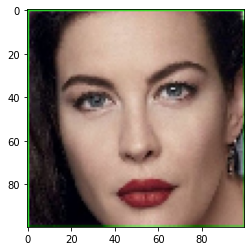

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(100, 100))
  x = img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  #classes = model.predict(images, batch_size=8)
  classes = model.predict(images, batch_size=8)
  print(np.argmax(classes))
  
  if classes[0,0]==1:    
    print('Wajah ini bentuk Heart')                                 #Jika gambar tangan membentuk Kertas, tampilkan tulisan "Kertas"
  elif classes[0,1]==1:
    print('Wajah ini bentuk Oblong')                                 #Jika gambar tangan membentuk Batu, tampilkan tulisan "Batu"
  elif classes[0,2]==1:
    print('Wajah ini bentuk Oval')                                #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  elif classes[0,3]==1:
    print('Wajah ini bentuk Round')                                #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  elif classes[0,4]==1:
    print('Wajah ini bentuk Square')                                #Jika gambar tangan membentuk Gunting, tampilkan tulisan "Gunting"
  else:
    print('Tidak Diketahui')

# Menyimpan Model

In [ ]:
model.save('/content/drive/MyDrive/PA/Model PA.h5')